# Lei do Resfriamento de Newton (Exemplo para aula 02/05/22)

Usando como base a **Lei do Resfriamento de Newton**, teremos

\begin{equation}
    \dfrac{d\theta}{dt} = -k_t \dot (\theta - \theta_m)
\end{equation}

Podemos discretizar a equação diferencial em (1) seguindo um conjunto lógico de passos:


   1) Sabemos, pela formulação do **Polinômio de Taylor** que podemos escrever a derivada presente em (1) como
        \begin{equation}
            \theta'(t_j) = \dfrac{\theta_{j} - \theta_{0}}{h}\cdot \tau_j
        \end{equation}

   2) Como queremos uma aproximação, podemos desconsiderar o $\tau_j$ na nossa equação. Assim
        \begin{equation}
            \theta'(t_j) = \dfrac{\theta_{j} - \theta_{0}}{h}
        \end{equation}

   3) Substituímos na nossa euqação inicialmente dada
        \begin{equation}
            \dfrac{\theta_{j} - \theta_{0}}{h} = -k_t (\theta_0 - \theta_m)
        \end{equation}
   4) Agora teremos que isolar o termo que queremos descobrir ($\theta_j$) na equação
        \begin{equation}
            \theta_j - \theta_0 = h\cdot[-k_t(\theta_0 - \theta_m)]
        \end{equation}
        \begin{equation}
            \theta_j = \theta_0 + h\cdot[-k_t(\theta_0 - \theta_m)]
        \end{equation}
   5) Colocando $\theta_0$ em evidência
        \begin{equation}
            \theta_j = \theta_0 + h\cdot(-k_t\theta_0 + k_t\theta_m)
        \end{equation}
        \begin{equation}
            \theta_j = \theta_0 - h\cdot k_t\theta_0 + h\cdot k_t\theta_m
        \end{equation}
        \begin{equation}
            \theta_j = \theta_0 \cdot (1 - h \cdot k_t) + h \cdot k_t \cdot \theta_m
        \end{equation}


Temos agora a **formulação de diferenças finitas** para nossa equação. Podemos aplicar o **Método de Euler Explícito** para resolver essa equação numericamente.

In [20]:
# Importando as bibliotecas
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from matplotlib import style

In [21]:
# Primeiramente, definimos os dados do PVI e alguns outros dados iniciais
theta_inicial = 80 # temperatura inicial do corpo
theta_meio = 0 # temperatura inicial do meio
k_t = 0.1386 # constante
T = 20 # minuto final (onde parar a discretização)

# números de pontos nas discretizações
M = 4
M_1 = 8
M_2 = 16
M_3 = 32
M_4 = 64
M_5 = 128

# calculando o espaço entre os pontos da discretização
h = T/M
h1 = T/M_1
h2 = T/M_2
h3 = T/M_3
h4 = T/M_4
h5 = T/M_5

In [22]:
def theta(t):
    return (80*pow(mt.e, -k_t*t))

In [23]:
# Preparando para o Método de Euler
t = np.zeros(M)
y = np.zeros(len(t) + 1)

for i in range(M):
    t[i] = i

t1 = np.zeros(M_1)
y1 = np.zeros(len(t1) + 1)

for i in range(M_1):
    t1[i] = i

t2 = np.zeros(M_2)
y2 = np.zeros(len(t2) + 1)

for i in range(M_2):
    t2[i] = i

t3 = np.zeros(M_3)
y3 = np.zeros(len(t3) + 1)

for i in range(M_3):
    t3[i] = i

t4 = np.zeros(M_4)
y4 = np.zeros(len(t4) + 1)

for i in range(M_4):
    t4[i] = i

t5 = np.zeros(M_5)
y5 = np.zeros(len(t5) + 1)

for i in range(M_5):
    t5[i] = i

In [24]:
# Executando o Método de Euler Explícito
y[0] = theta_inicial
for i in range(0, len(t)):
    y[i + 1] = y[i] * (1 - k_t*h) + h*k_t*theta_meio

y1[0] = theta_inicial
for i in range(0, len(t1)):
    y1[i + 1] = y1[i] * (1 - k_t*h1) + h1*k_t*theta_meio

y2[0] = theta_inicial
for i in range(0, len(t2)):
    y2[i + 1] = y2[i] * (1 - k_t*h2) + h2*k_t*theta_meio

y3[0] = theta_inicial
for i in range(0, len(t3)):
    y3[i + 1] = y3[i] * (1 - k_t*h3) + h3*k_t*theta_meio

y4[0] = theta_inicial
for i in range(0, len(t4)):
    y4[i + 1] = y4[i] * (1 - k_t*h4) + h4*k_t*theta_meio

y5[0] = theta_inicial
for i in range(0, len(t5)):
    y5[i + 1] = y5[i] * (1 - k_t*h5) + h5*k_t*theta_meio


In [25]:
# Exibindo os resultados em uma tabela

print(" Tempo(min) \t\t\t\t\t\t   Temperatura(°C)")
print("-----------------------------------------------------------------------------------------------------------")
for i in range(len(y)):
    print(" %f \t\t\t\t|\t\t\t\t %f" % (i*h, y[i]))

 Tempo(min) 						   Temperatura(°C)
-----------------------------------------------------------------------------------------------------------
 0.000000 				|				 80.000000
 5.000000 				|				 24.560000
 10.000000 				|				 7.539920
 15.000000 				|				 2.314755
 20.000000 				|				 0.710630


In [26]:
# Preparando dados para plotagem

t = np.zeros(len(y))

for i in range(len(y)):
    t[i] = i*h

t1 = np.zeros(len(y1))

for i in range(len(y1)):
    t1[i] = i*h1

t2 = np.zeros(len(y2))

for i in range(len(y2)):
    t2[i] = i*h2

t3 = np.zeros(len(y3))

for i in range(len(y3)):
    t3[i] = i*h3

t4 = np.zeros(len(y4))

for i in range(len(y4)):
    t4[i] = i*h4

t5 = np.zeros(len(y5))

for i in range(len(y5)):
    t5[i] = i*h5

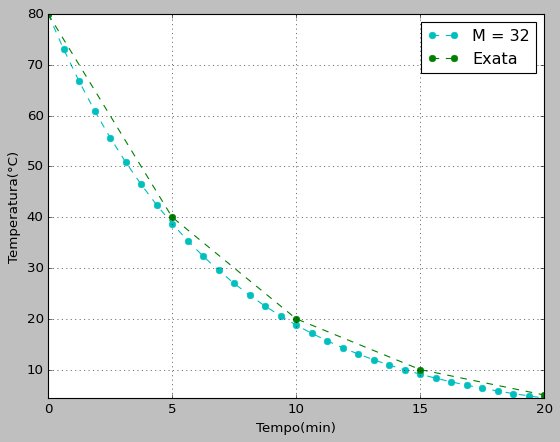

In [33]:
# Plotando o gráfico

## Solução Aproximada + Exata
with plt.style.context('classic'):
    plt.grid(True)
    plt.xlabel("Tempo(min)")
    plt.ylabel("Temperatura(°C)")

    #plt.plot(t,y, 'r--o', label="M = 4")
    #plt.plot(t1,y1, 'b--o', label="M = 8")
    #plt.plot(t2,y2, 'm--o', label="M = 16")
    plt.plot(t3,y3, 'c--o', label="M = 32")
    #plt.plot(t5,y5, 'y--o', label="M = 128")

    plt.plot(t,theta(t), 'g--o', label="Exata")
    plt.legend(loc="upper right")
plt.show()

